### Video Media Type

In [1]:
# import necessary library for handling images
from PIL import Image

#### Part 1

In [2]:
# load frame1 and frame2
frame1_path = "Picture1.jpg"
frame2_path = "Picture2.jpg"

frame1 = Image.open(frame1_path).convert("L")  # Convert to grayscale
frame2 = Image.open(frame2_path).convert("L")  # Convert to grayscale

In [3]:
# import librabry to display image
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Picture 2')

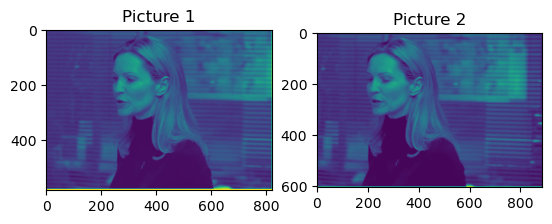

In [4]:
# display first image
plt.subplot(1, 2, 1)
plt.imshow(frame1)
plt.title('Picture 1')

# display second image
plt.subplot(1, 2, 2)
plt.imshow(frame2)
plt.title('Picture 2')

In [5]:
# Choose random areas of size 16x16 in frame2:

In [6]:
# import necessary library for randomization
import random

In [7]:
# define function to select random 16x16 blocks
def select_random_block(image):
    width, height = image.size
    x = random.randint(0, width - 16)
    y = random.randint(0, height - 16)
    return image.crop((x, y, x + 16, y + 16))

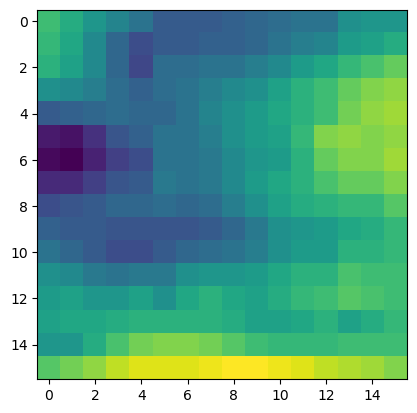

In [8]:
# Select random blocks from frame2
block2 = select_random_block(frame2)
plt.imshow(block2)

In [9]:
# Find the most similar area in frame1 (Motion estimation):

In [10]:
# define function to find most similar area using Sum of Absolute Differences (SAD)
def motion_estimation(block, image):
    min_sad = float('inf')
    best_match = None
    
    for y in range(image.size[1] - 16):
        for x in range(image.size[0] - 16):
            region = image.crop((x, y, x + 16, y + 16))
            sad = sum(abs(p1 - p2) for p1, p2 in zip(block.getdata(), region.getdata()))
            if sad < min_sad:
                min_sad = sad
                best_match = region
    
    return best_match

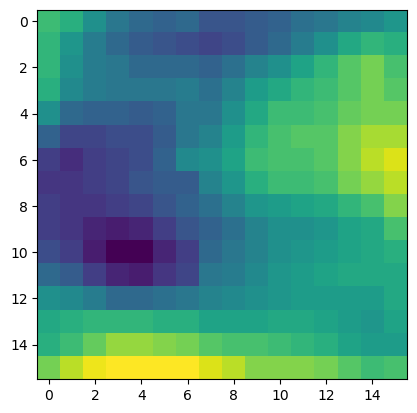

In [11]:
# Find the most similar area in frame1
best_match = motion_estimation(block2, frame1)
plt.imshow(best_match)

#### Part 2
Find the difference of the selected block with the most similar area in frame1

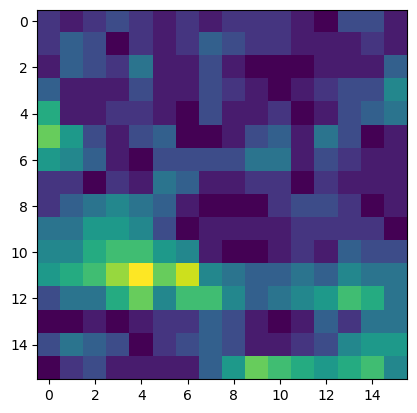

In [12]:
# Calculate the difference between the selected block and the best match
from PIL import ImageChops
difference = Image.eval(ImageChops.difference(block2, best_match), lambda x: abs(x))
plt.imshow(difference)

#### Part 3 
Use DCT to find the discrete cosine transform coefficients of the difference:

In [13]:
# import necessary libraries
import numpy as np
from scipy.fft import dct

In [14]:
# Convert image to numpy array
difference_array = np.array(difference)

In [15]:
# Apply 2D DCT
dct_coeffs_difference = dct(dct(difference_array.T, norm='ortho').T, norm='ortho')
print(f"dct_coeffs_difference: \n{dct_coeffs_difference}")

dct_coeffs_difference: 
[[ 5.03750000e+01  4.90912934e+00  5.93847748e+00 -3.39866205e+00
  -2.70598050e-01  8.46534318e-01 -7.65278130e-01  1.86385474e+00
  -3.75000000e-01  6.02714119e-01 -4.74864815e-01 -1.91858907e+00
   6.53281482e-01  6.12928534e-01  1.30721168e-01  6.03357976e-01]
 [-1.66902421e+01  4.46768218e+00  1.23526823e+00  3.87336765e+00
   3.68820748e+00  2.95515802e-01  2.93026681e+00  1.37460699e+00
   1.43755988e+00 -4.92941193e-01  5.33060190e-01 -1.74677259e+00
   1.56804652e+00  9.61782291e-01 -5.84357717e-02  1.52428533e-01]
 [ 8.73664392e-02 -1.29715488e+01 -2.08904257e+00 -8.15529855e-01
   5.25012974e+00 -2.24033941e+00 -4.07784303e+00 -1.05252685e+00
   2.61986949e-01  9.38596117e-01 -2.72200426e+00 -1.09972211e-02
  -1.06826171e+00  6.50510064e-01  1.40226549e+00  1.34519780e-01]
 [ 5.53443340e+00  1.06558112e+01 -1.57565004e+00 -8.86497854e+00
  -7.45504573e+00 -9.73951101e-01 -1.70381243e+00 -1.36174043e+00
   2.40074493e-01  1.99075816e+00 -1.29503224e+00

#### Part 4 
Round the coefficients to their nearest integer:

In [16]:
dct_coeffs_difference_rounded = np.round(dct_coeffs_difference)
print(f"dct_coeffs_difference_rounded: \n{dct_coeffs_difference_rounded}")

dct_coeffs_difference_rounded: 
[[ 50.   5.   6.  -3.  -0.   1.  -1.   2.  -0.   1.  -0.  -2.   1.   1.
    0.   1.]
 [-17.   4.   1.   4.   4.   0.   3.   1.   1.  -0.   1.  -2.   2.   1.
   -0.   0.]
 [  0. -13.  -2.  -1.   5.  -2.  -4.  -1.   0.   1.  -3.  -0.  -1.   1.
    1.   0.]
 [  6.  11.  -2.  -9.  -7.  -1.  -2.  -1.   0.   2.  -1.   1.  -2.  -2.
    3.   1.]
 [ -9.  -4.  -2.   7.  -1.  -3.  -1.  -1.  -4.  -1.   0.   2.   0.  -0.
   -2.  -1.]
 [  3.   0.  -4.   1.   2.   4.   0.   0.  -2.   0.   1.  -0.  -1.  -0.
   -2.   1.]
 [  8.   3.   2.   5.  -1.  -1.   2.   3.  -2.   2.   1.   1.   1.  -1.
    1.   0.]
 [-10.  -1.   5.  -0.   0.   0.  -1.   1.   3.   1.   0.   2.   2.   1.
   -1.  -1.]
 [  7.  -5.  -4.  -2.  -2.  -0.   1.   1.   1.   3.   1.   1.  -1.  -1.
    1.  -0.]
 [ -5.   1.   2.  -5.   3.   1.   1.  -1.  -1.   1.   2.   2.   0.  -1.
    0.  -0.]
 [  1.  -4.  -2.   3.  -1.  -1.  -2.   1.   0.   0.  -0.  -0.  -0.   1.
    0.   0.]
 [  4.   4.   3.  -0.  -2.   0.  

#### Part 5 
Repeat steps 5-6 for the selected area:

In [17]:
# Convert block2 to numpy array
block2_array = np.array(block2)

In [18]:
# Apply 2D DCT
dct_coeffs_block2 = dct(dct(block2_array.T, norm='ortho').T, norm='ortho')
print(f"dct_coeffs_block2: \n{dct_coeffs_block2}")

dct_coeffs_block2: 
[[ 5.94000000e+02 -7.42918871e+01  2.05892958e+01 -1.11564254e+00
   3.34226419e+00  2.78258601e+00  1.53717114e-01 -1.79139186e-01
   1.25000000e-01  2.47561493e-01  8.81101766e-01  4.12213995e-01
   1.86276545e+00 -1.28058427e+00  2.49354948e-01 -1.27960050e+00]
 [-5.18116219e+01 -1.50133063e+01  2.77430479e+01  7.47337648e+00
   6.36852441e+00  5.02736788e-01 -8.01445725e-03 -2.80872751e-01
  -1.86507965e+00 -5.48444061e-01  1.37975413e+00  1.80927251e+00
   1.58544087e+00 -4.50369660e-01 -6.68810182e-01 -1.48867569e+00]
 [ 4.49585485e+01  5.15766507e+01  3.88986043e+00  3.86433227e+00
   5.65353143e+00  1.06035716e+00 -1.34221355e+00 -9.65816613e-01
  -4.02753337e-01  1.49047552e+00 -2.08994396e+00 -3.62618945e-01
  -1.22264388e+00  2.25560827e-01  5.69972255e-01  2.79614927e-01]
 [-3.95080057e+01  2.32610416e+01  2.14986579e+01  1.23324130e+01
   7.01019036e+00  2.01184367e+00  1.80944535e+00 -1.93304615e+00
  -1.56967332e+00  1.89518421e+00 -1.69418712e+00 -1.

#### Pqrt 6 
Round the coefficients

In [19]:
# Round the coefficients
dct_coeffs_block2_rounded = np.round(dct_coeffs_block2)
print(f"dct_coeffs_block2_rounded: \n{dct_coeffs_block2_rounded}")

dct_coeffs_block2_rounded: 
[[594. -74.  21.  -1.   3.   3.   0.  -0.   0.   0.   1.   0.   2.  -1.
    0.  -1.]
 [-52. -15.  28.   7.   6.   1.  -0.  -0.  -2.  -1.   1.   2.   2.  -0.
   -1.  -1.]
 [ 45.  52.   4.   4.   6.   1.  -1.  -1.  -0.   1.  -2.  -0.  -1.   0.
    1.   0.]
 [-40.  23.  21.  12.   7.   2.   2.  -2.  -2.   2.  -2.  -2.  -0.  -1.
    2.   0.]
 [  2.   7.  -7.  -3.  -5.  -3.   2.   2.  -0.  -1.   1.   1.   1.  -0.
   -0.  -0.]
 [-11.  -3.  -5.  -7.  -2.   2.  -2.   2.   2.  -0.   1.  -1.  -1.   0.
    0.   1.]
 [  2.  -5.  -4.   1.  -2.  -1.  -1.   3.   0.   2.  -0.  -0.  -0.  -0.
    1.   0.]
 [-12.   9.   2.  -3.  -3.  -4.  -0.   1.   2.   1.  -1.  -1.  -1.   0.
    0.   1.]
 [ 20.   2.  -1.   3.  -1.  -3.  -1.   1.  -0.   2.  -2.  -2.  -1.  -1.
    1.   0.]
 [ -8.  -0.  -0.  -3.   1.   0.   1.   0.  -1.   0.   0.   1.   0.  -0.
    0.   0.]
 [  4.  -1.   2.   2.  -1.   0.  -0.   0.   0.  -0.  -0.  -0.  -0.   0.
   -0.   1.]
 [ -0.  -1.  -2.  -2.  -2.   1.   0. 

#### Part 7
Compare the coefficients in both cases and elaborate on the results:

In [20]:
# Check the range of the variable being predicted
min_value = np.min(dct_coeffs_block2_rounded)
max_value = np.max(dct_coeffs_block2_rounded)

In [21]:
# display results
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: -74.0
Maximum value: 594.0


In [22]:
# Check if the variable is typically in the thousands
if max_value >= 1000:
    print("The variable being predicted is typically in the thousands or larger.")
elif min_value > 0 and max_value < 1:
    print("The variable being predicted is typically between 0 and 1.")
else:
    print("The variable being predicted has a range not covered by the checks.")

The variable being predicted has a range not covered by the checks.


In [23]:
# compute the mean squared error (mse)
mse = np.mean((dct_coeffs_difference_rounded - dct_coeffs_block2_rounded) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1235.55078125


The MSE measures the average squared difference between corresponding coefficients, indicating the level of distortion introduced by the compression process. A higher MSE indicates a larger discrepancy between the two sets of coefficients, implying greater information loss during compression. Conversely, a lower MSE would indicate a closer match between the blocks, indicating less distortion and better compression quality.

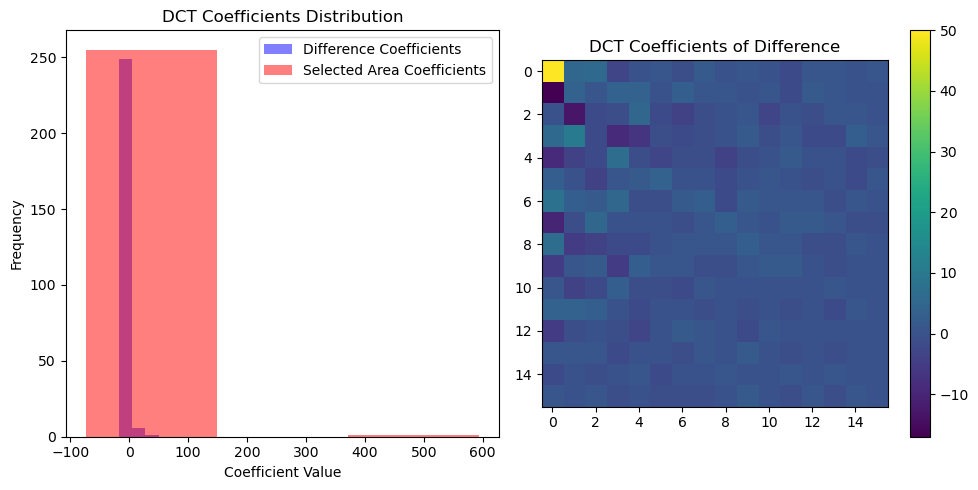

In [24]:
# visualize coefficients
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(dct_coeffs_difference_rounded.flatten(), bins=3, color='blue', alpha=0.5, label='Difference Coefficients')
plt.hist(dct_coeffs_block2_rounded.flatten(), bins=3, color='red', alpha=0.5, label='Selected Area Coefficients')
plt.title('DCT Coefficients Distribution')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.imshow(dct_coeffs_difference_rounded, cmap='viridis', interpolation='nearest')
plt.title('DCT Coefficients of Difference')
plt.colorbar()

plt.tight_layout()
plt.show()

In [25]:
# calculate Compression Ratio
num_nonzero_difference = np.count_nonzero(dct_coeffs_difference_rounded)
num_nonzero_block2 = np.count_nonzero(dct_coeffs_block2_rounded)

In [26]:
# copression ratio
compression_ratio = num_nonzero_block2 / num_nonzero_difference
print("Compression Ratio:", compression_ratio*100)

Compression Ratio: 87.29281767955801


The higher compression ratio, the higher the level of compression. In this case, the size of the compressed data is approximately 78.67% of the original data. Implying that the compression algorithm has reduced the data size by about 21.33%.

**Inference**
1. The high MSE suggests that the compression process introduces noticeable distortion in the selected block compared to its original representation.
2. However, the relatively high compression ratio indicates that despite the distortion, a significant reduction in data size is achieved.

The obtained MSE and compression ratio suggest that while the compression process significantly reduces data size, it also introduces noticeable distortion in the compressed block.